In [3]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import cmdstanpy as cmds
import numpy as np
import scipy as sp
import csv
import os

# Exercise 1

In [5]:
data1 = pd.read_csv('Data1.csv', index_col=0, header=0, parse_dates=[0])
data1.head()

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433


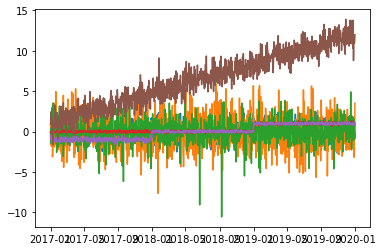

In [4]:
plt.plot(data1);

#fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True)
#axs = axs.flatten()
#axs[0].hist(data1)
#axs[1].hist(data1)
plt.hist(data1, bins = 20)

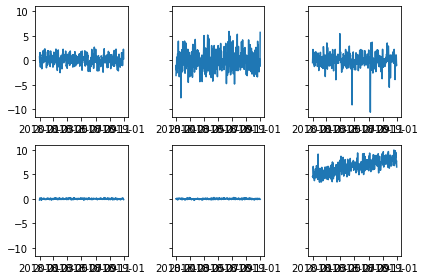

In [14]:
fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True)
axs = axs.flatten()
for i, col_name in enumerate(data1.columns):
    col = data1[col_name]
    axs[i].plot(col.loc['2018-1-1':'2018-12-31'])

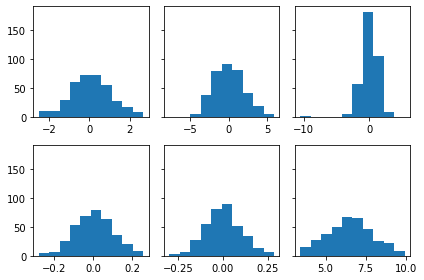

In [13]:
fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True)
axs = axs.flatten()
for i, col_name in enumerate(data1.columns):
    col = data1[col_name]
    axs[i].hist(col.loc['2018-1-1':'2018-12-31'])

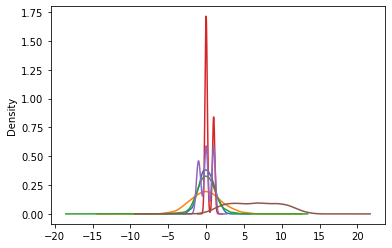

In [12]:
for i, col_name in enumerate(data1.columns):
    col.append(data1[col_name])
    col[i].plot.kde()

# Exercise 2 

In [15]:
data_ny = {
       "N": 9,
       "y": [0, 0, 0, 0, 0, 1, 1, 1, 1]
       }

In [16]:
stan = cmds.CmdStanModel(stan_file='bern_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [17]:
result = stan.sample(data=data_ny)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


       Mean    MCSE  StdDev    5%  95%   N_Eff  N_Eff/s  R_hat
name                                                          
lp__  -8.10  0.0170    0.75 -9.60 -7.6  2000.0  18000.0    1.0
theta  0.46  0.0037    0.14  0.23  0.7  1500.0  13000.0    1.0


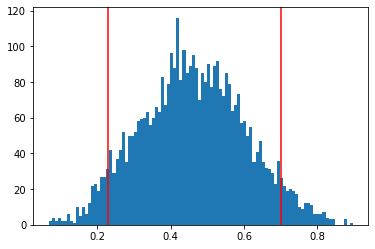

In [18]:
statistics = result.summary([5, 95])
print(statistics)
plt.hist(result.stan_variable('theta'), bins=100);
plt.axvline(x=statistics['5%']['theta'], color = 'r');
plt.axvline(x=statistics['95%']['theta'], color = 'r');